# Time series analysis

###- [https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python]
- decomposition
- detrend
- cross correlation
- Granger causality test - if one is sequence of another 


In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import functools
import operator
import os
import os.path as op
import numpy as np
import pytrends
from pytrends.request import TrendReq as UTrendReq
from datetime import date
import datetime as d
from collections import Counter
import itertools


In [2]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

In [3]:
# datetimes = pd.to_datetime(df['lastModifiedDate'])
# df['ts_lastModifiedDate']=datetimes
# #df.iloc[ts_start]['ts_lastModifiedDate']


# #find start index for subset 2019-2022
# ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
#           & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
# print(ts_start)
# #find end date for subset 2019-2022
# ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
#           & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
# print(ts_end)

# start_date=datetimes[datetimes == ts_start]
# end_date=datetimes[datetimes == ts_end]

# #find index for the chosen start and end dates
# start_index=start_date.index[0]
# print(start_index)
# df[df.index == start_date.index[0]]

# end_index=end_date.index[0]
# print(end_index)
# df[df.index == end_date.index[0]]

# df_subset=df[start_index:end_index]


In [4]:

# # new keyword list from Madga 20.03
# filepath = '../data/interim/clean_keywords_2019-2021_after_RapidFuzz.json'
# df = pd.read_json(filepath, orient ='split', compression = 'infer')
# flat_keywords = list(itertools.chain(*list(df['keywordStringsCleanAfterFuzz'])))

In [5]:
df.head()

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,contentLinks,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language
0,55250,5070917,EU presidency power-sharing takes effect,EU shake-up,"<p>The Lisbon Treaty, which came into force at...",Spain takes over the European Union's rotating...,Spain is taking over the EU presidency just as...,None,[],"[{'name': 'Lisbon Treaty'}, {'name': 'European...",...,"[{'name': None}, {'name': 'Sweden wraps up six...",[{'name': 'Sweden wraps up six months in EU pr...,False,[],"[{'id': 28158946}, {'id': 28158947}, {'id': 28...",{'description': 'Lisbon Treaty: simplifying or...,"[{'name': 'Symbolbild Europa Fragezeichen'}, {...",[],False,None
1,55251,5074260,Berlin celebrates the arrival of 2010,New Year,<p>Almost a million people welcomed the start ...,Close to a million party-goers rang in the new...,Almost a million people celebrated the arrival...,None,[],"[{'name': 'Berlin'}, {'name': 'New Year'}, {'n...",...,"[{'name': None}, {'name': ''}]",[{'name': 'German chancellor outlines challeng...,False,[],"[{'id': 28160529}, {'id': 28160530}, {'id': 28...",{'description': 'Close to a million people att...,[{'name': 'Silvester Berlin'}],[],False,None
2,55252,5074350,Gebrselassie wins the Trier Corrida,Another victory,<p>Two-time Ethiopian Olympic champion Haile G...,Ethiopian champion runner Haile Gebrselassie h...,The Ethiopian marathon star Haile Gebrselassie...,None,[],"[{'name': 'Haile Gebrselassie'}, {'name': 'Eth...",...,[{'name': None}],[],False,[],"[{'id': 28160540}, {'id': 28160541}, {'id': 28...","{'description': 'In Dubai, Gebrselassie hopes ...",[{'name': 'Haile Gebrselassie Äthiopien gewinn...,[],False,None
3,55253,5074530,Disqualified Four Hills frontrunners still in ...,Four Hills,"<p>Andreas Kofler, who won at Obertsdorf with ...",The competition continues at the second event ...,The Four Hills Tournament continues with the s...,None,[],"[{'name': 'four hills tournament'}, {'name': '...",...,"[{'name': None}, {'name': ''}, {'name': ''}, {...",[{'name': 'Austrian soars ahead at Four Hills ...,False,[],"[{'id': 28160546}, {'id': 28160547}, {'id': 28...",{'description': 'The German jumpers have so fa...,[{'name': 'Pascal Bodmer'}],[],False,None
4,55254,5074845,Prominent activists arrested at Moscow demonst...,Activists arrested,<p>Police confirmed that they had arrested abo...,"Human rights defender Ludmila Alexeeva, radica...","The ""grand dame"" of Russia's human rights move...",None,[],"[{'name': 'human rights'}, {'name': 'demonstra...",...,"[{'name': None}, {'name': ''}, {'name': None},...",[{'name': 'Former Russian 'YouTube' officer to...,False,[],"[{'id': 28160618}, {'id': 28160619}, {'id': 28...",{'description': 'Russian police say they have ...,[{'name': 'Demonstration der russischen Opposi...,[],False,None


## Angela Analysis

In [6]:
GET_METHOD='get'


headers = {
    'authority': 'trends.google.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
    'content-type': 'application/json;charset=UTF-8',
    'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
    'origin': 'https://trends.google.com',
    'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-full-version': '"110.0.5481.177"',
    'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-platform-version': '"13.2.1"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
}


class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




In [7]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2010-01-01 2023-03-15')
#angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2019-01-01 2021-01-01')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')
# angie_does_google = angie_does_google['Angela Merkel'].values


In [8]:
# keywords = df['keywordStrings'].iloc[0]
# df_test = pd.DataFrame({'keywords':keywords})
# df_test['google_trends'] = df_test['keywords'].apply(get_interest_over_time, end_date=('2023-01-01'))

In [9]:
# big_df = pd.concat([df_test.google_trends.iloc[i] for i in range(df_test.shape[0])])
# big_df
# # df_test.google_trends.iloc[0]


In [10]:
#let's get timeseries from all Angela Merkel mentions 
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)

df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)
df_angela['date_month'] = df_angela['date_month'].apply(lambda x: int(x.replace('-','')))
all_year_months = [year*100+month for month in range(1, 13) for year in range(2010, 2023)]
#all_year_months = [year*100+month for month in range(1, 13) for year in range(2019, 2021)]

In [11]:
not_in_df = list(set(all_year_months) - set(df_angela['date_month'].tolist()))
yearmonth_counts = dict(Counter(df_angela['date_month'].tolist()))
for key_ in not_in_df:
    yearmonth_counts[key_] = 0 

In [12]:
yearmonth_counts.keys()
df_yearmonth_counts = pd.DataFrame.from_dict(yearmonth_counts, orient='index', columns=['val'])
df_yearmonth_counts['month_str'] = [str(i) for i in df_yearmonth_counts.index]
df_yearmonth_counts = df_yearmonth_counts.sort_values(by='month_str')


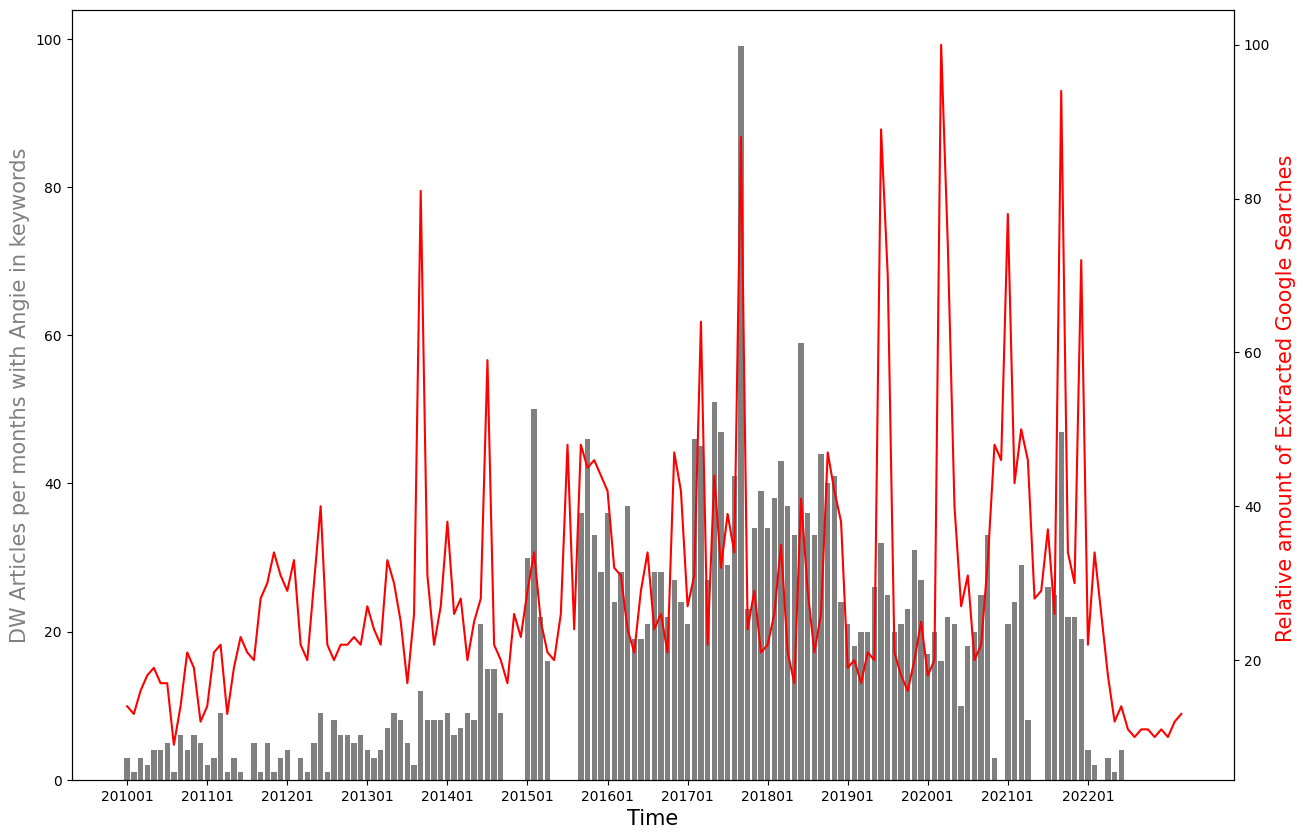

In [13]:
fig,ax = plt.subplots(figsize = (15,10))
ax.bar(df_yearmonth_counts['month_str'], df_yearmonth_counts.val, color = 'grey')
ax.set_xticks(df_yearmonth_counts['month_str'][::12], rotate = 60)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('DW Articles per months with Angie in keywords', color = 'grey', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(np.arange(0,len(angie_does_google.values)), angie_does_google.values, color = 'r')
ax2.set_ylabel('Relative amount of Extracted Google Searches ', color = 'r', fontsize = 15)
# save it
# output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
# file_name = 'Angela_Merkel_and_DW_a_love_story.pdf'
# fig.savefig(op.join(output_dir,file_name))
plt.show()


In [14]:
size = df_yearmonth_counts.val.values.shape[0]
dw_raw = df_yearmonth_counts.val.values

In [15]:
google_raw = angie_does_google[:size]['Angela Merkel'].values

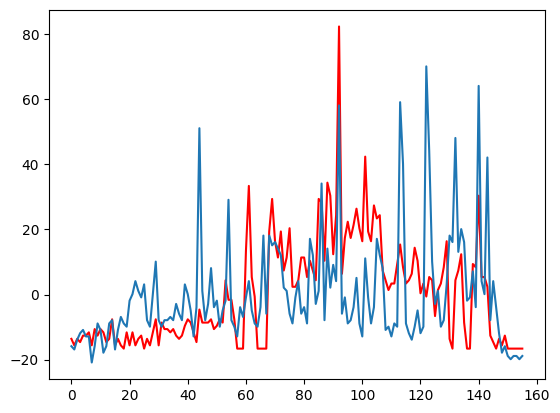

In [16]:
#let's subtract the meean from each signal 
dw = dw_raw-np.mean(dw_raw)
google = google_raw-np.mean(google_raw)

plt.plot(dw,'red')
plt.plot(google)

In [17]:
len(google)
# df_yearmonth_counts


156

create signle dataframe with time, dw word and google word

In [18]:
dw_df=pd.DataFrame({'yearmonth': df_yearmonth_counts['month_str'], 'dw_raw': dw_raw,'google_raw': google_raw})
#min_id=dw_df['dw_raw'].min()
dw_df #[dw_df['dw_raw']==0]
dw_df['dw_raw']=dw_df['dw_raw'].replace(0, None)
dw_df['dw_raw'].min()

1

In [22]:
dw_df

,yearmonth,dw_raw,google_raw
201001,201001,3,14
201002,201002,1,13
201003,201003,3,16
201004,201004,2,18
201005,201005,4,19
...,...,...,...
202208,202208,4,10
202209,202209,4,11
202210,202210,4,11
202211,202211,4,10


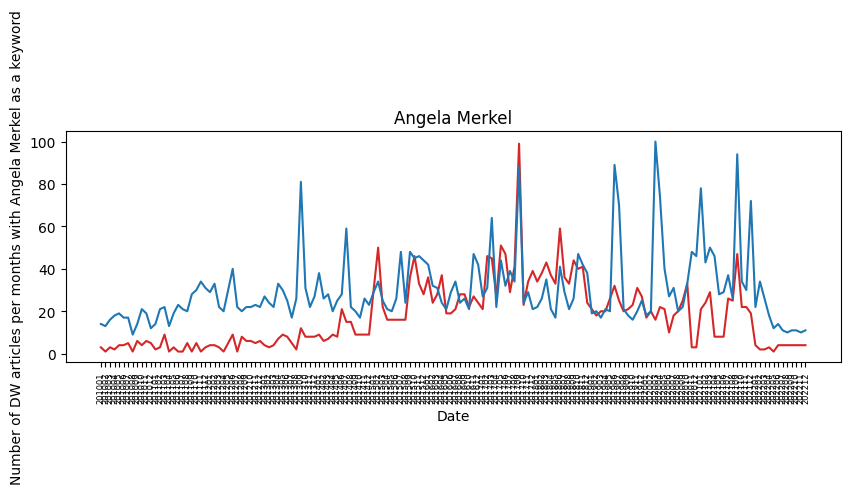

In [24]:
def plot_df(df, x, y, y1, title="", xlabel='Date', ylabel='Number of DW articles per months with Angela Merkel as a keyword', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.plot(x, y1, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=6, rotation=90)
    plt.show()

plot_df(dw_df, x=dw_df['yearmonth'], y=dw_df['dw_raw'], y1=dw_df['google_raw'], title='Angela Merkel')

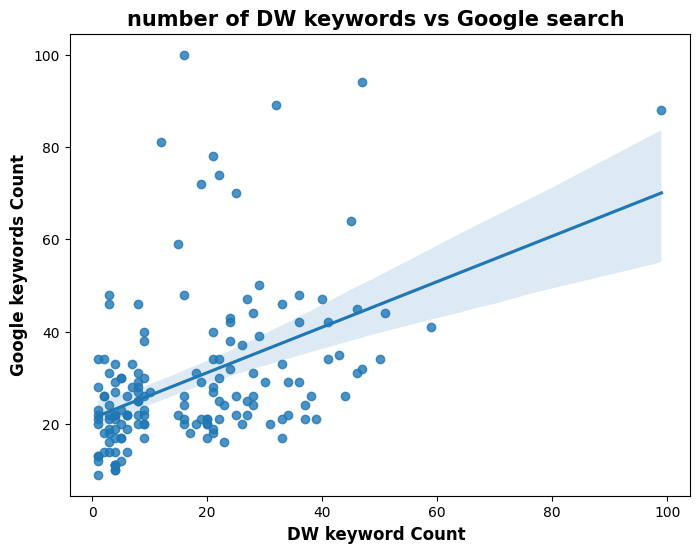

In [25]:
# scatter plot to see if there is a relationship ebtween the two time series
fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df, x = dw_df['dw_raw'], y =dw_df['google_raw'])
plt.title('number of DW keywords vs Google search ', weight='bold', fontsize = 15)
plt.ylabel('Google keywords Count', weight='bold', fontsize = 12)
plt.xlabel('DW keyword Count ', weight='bold', fontsize = 12)
plt.show()

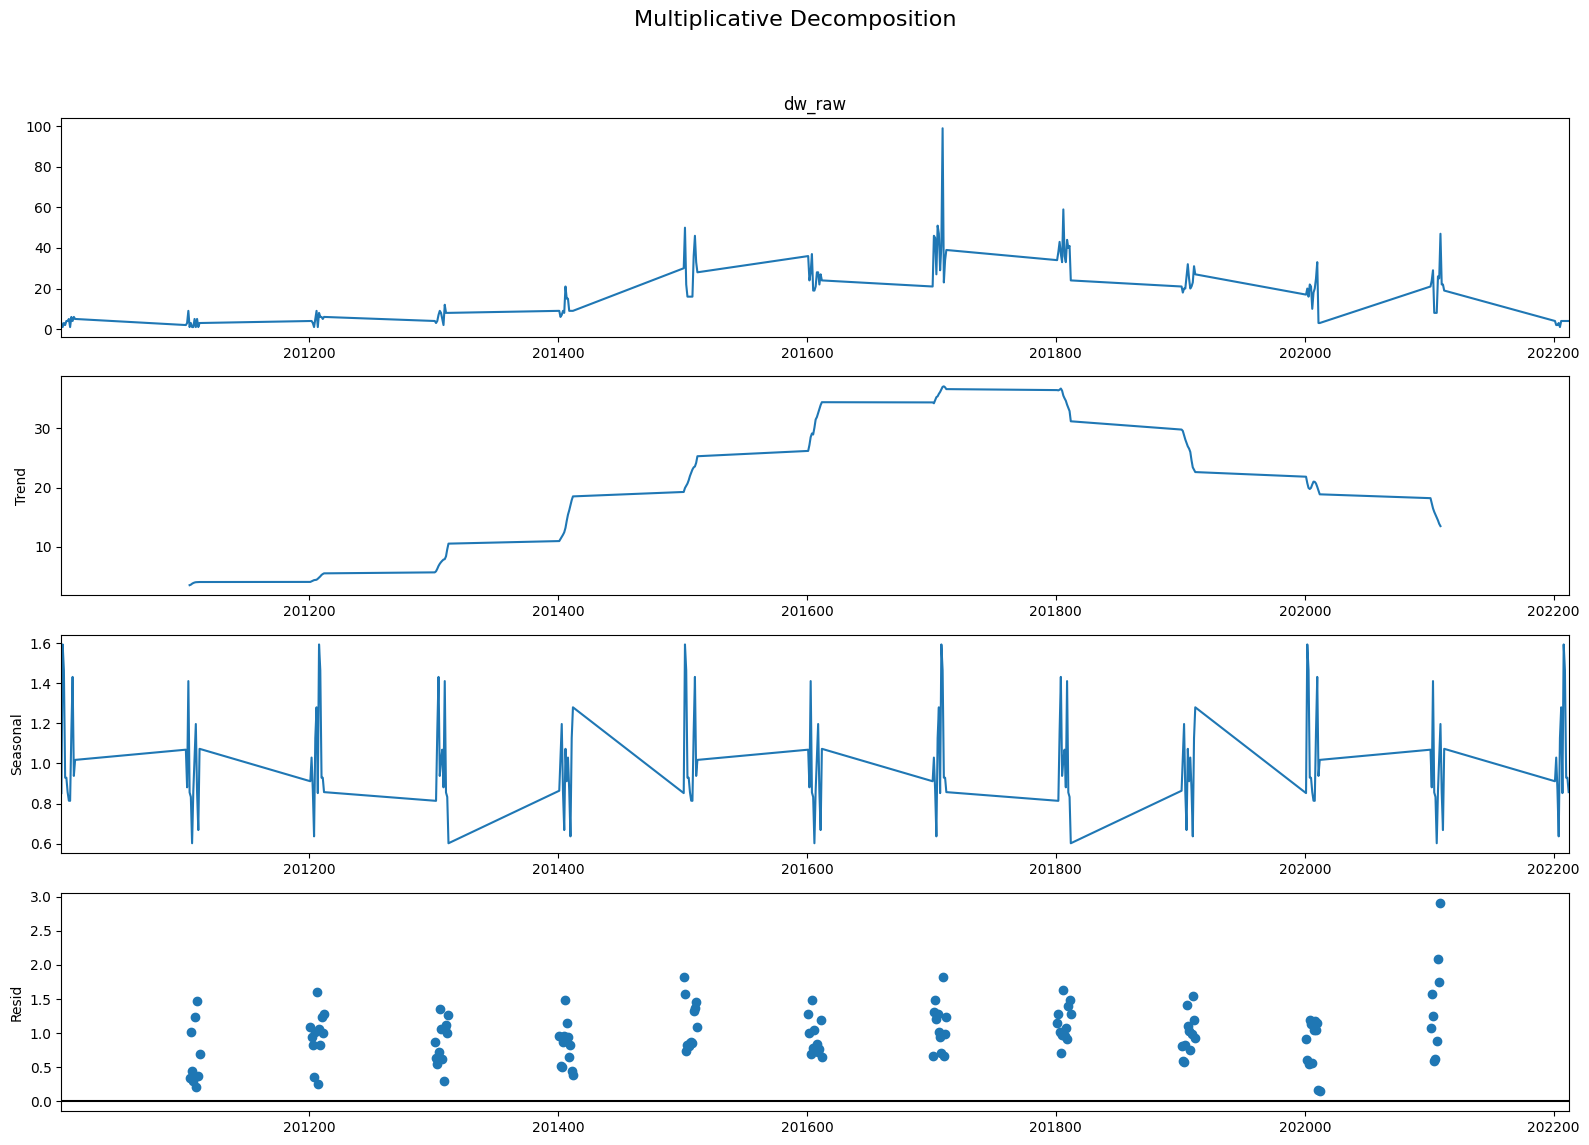

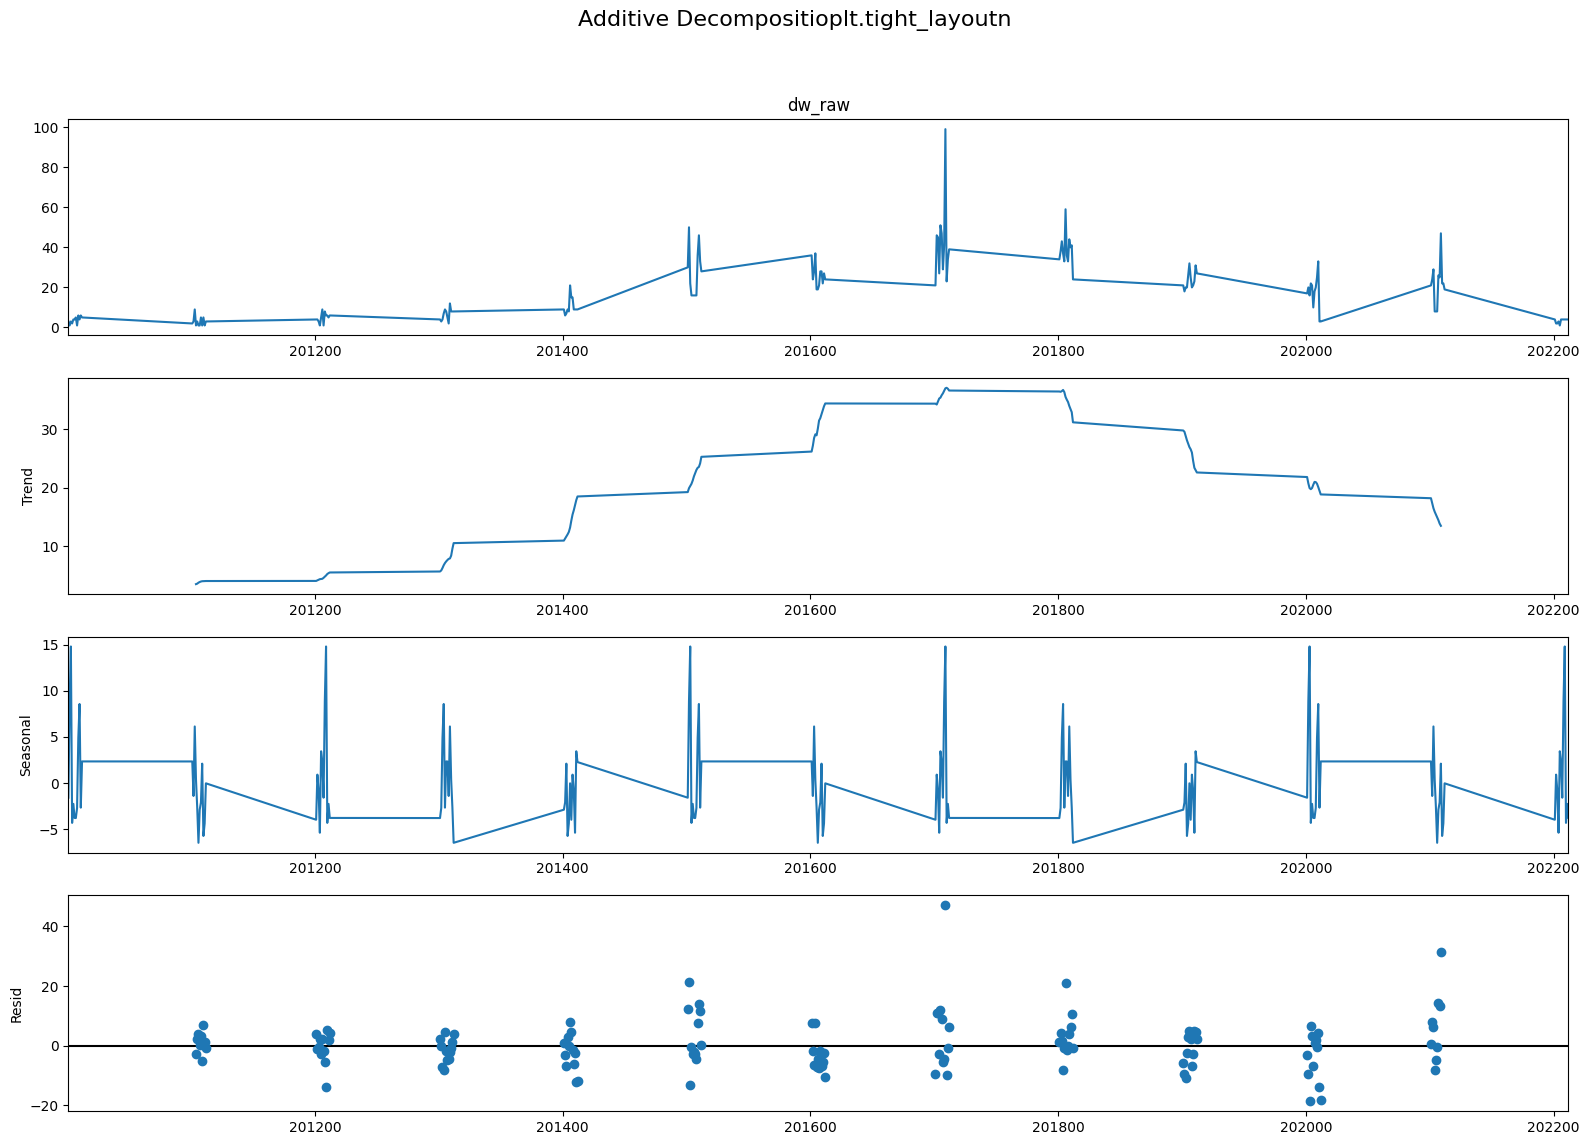

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(dw_df['dw_raw'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(dw_df['dw_raw'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decompositioplt.tight_layoutn', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [21]:
detrended

NameError: name 'detrended' is not defined

Text(0.5, 1.0, 'Angela Merkel DW detrended by subtracting the least squares fit')

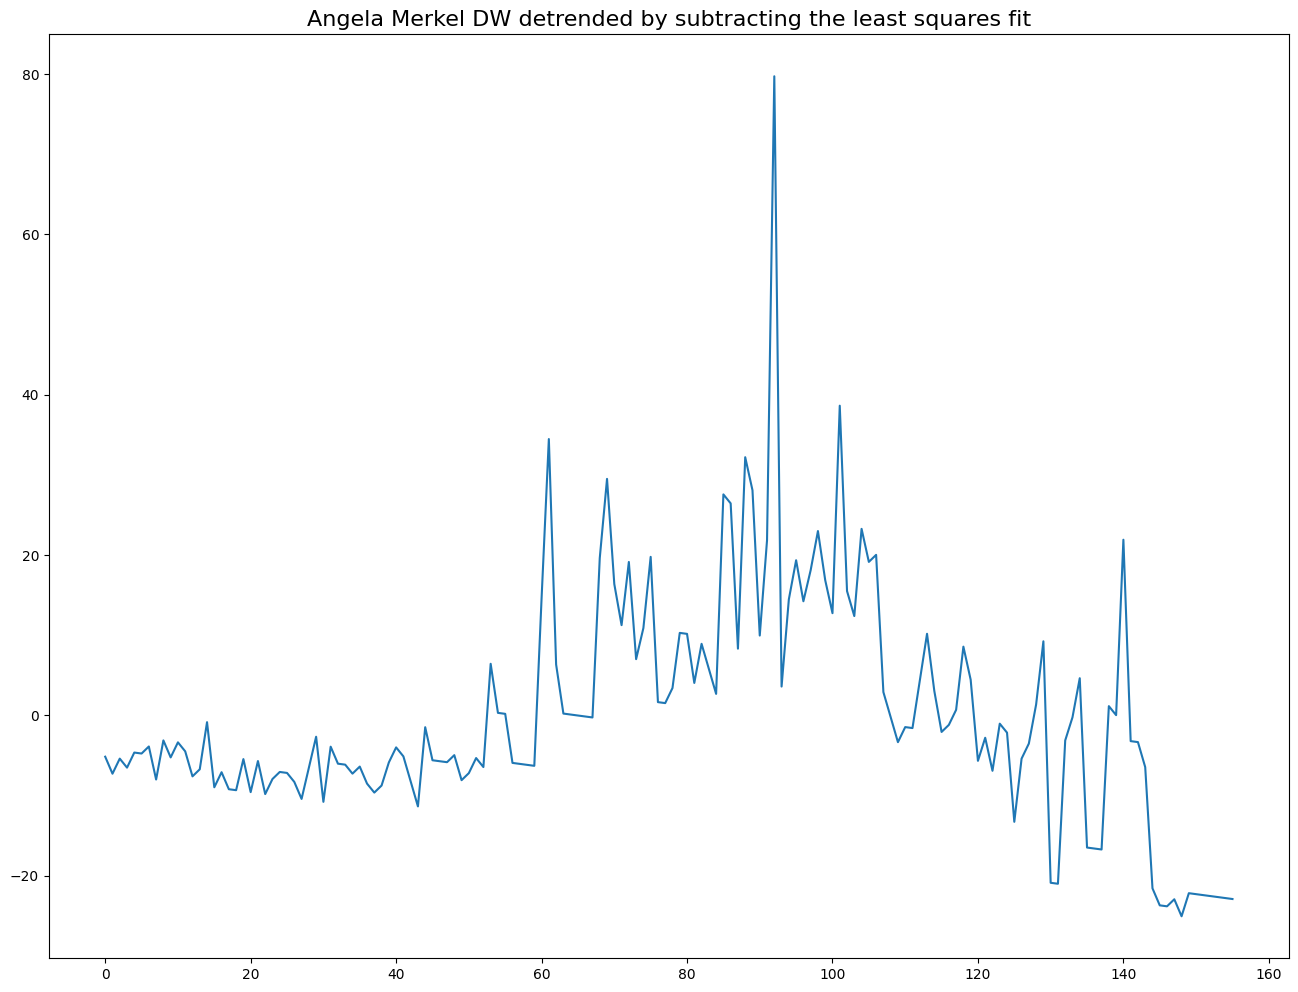

In [27]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended_dw = signal.detrend(dw_df['dw_raw'].values)
plt.plot(detrended_dw)
plt.title('Angela Merkel DW detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Angela Merkel from google detrended by subtracting the least squares fit')

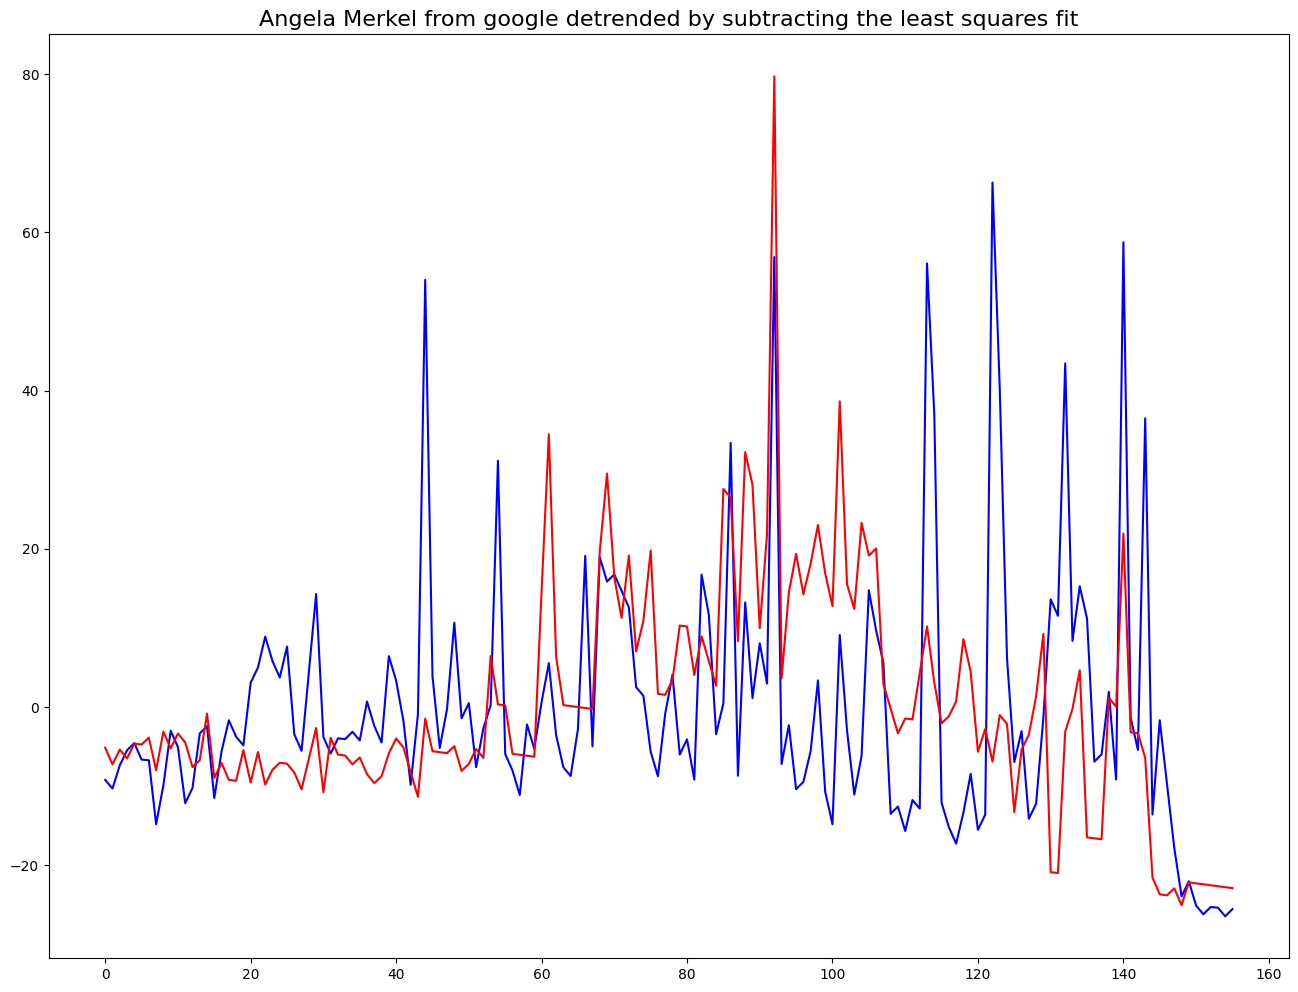

In [29]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended_google = signal.detrend(dw_df['google_raw'].values)
plt.plot(detrended_google,'blue')
plt.plot(detrended_dw,'red')
plt.title('Angela Merkel from google detrended by subtracting the least squares fit', fontsize=16)

In [ ]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(df['search_ielts'], df['reg_ielts'])
ccf_ielts

In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(dw_df['dw_raw'], model='multiplicative', period=30)
detrended = dw_df['dw_raw'].values - result_mul.trend
plt.plot(detrended)
plt.title('Angela Merkel detrended by subtracting the trend component', fontsize=16)

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(dw_df['dw_raw'].tolist())
#autocorrelation_plot(detrended.tolist())

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dw_df['dw_raw'].tolist(), lags=50, ax=axes[0])
plot_pacf(dw_df['dw_raw'].tolist(), lags=50, ax=axes[1])

# plot_acf(detrended.tolist(), lags=50, ax=axes[0])
# plot_pacf(detrended.tolist(), lags=50, ax=axes[1])

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(dw_df['dw_raw'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Angela Merkel', y=1.05)    
plt.show()

## Granger test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
#data = pd.read_csv('/kaggle/input/dataset/dataset.txt')
data['dw'] = dw_df['dw_raw']
data['google'] = dw_df['google_raw']
grangercausalitytests(data[['value', 'google']], maxlag=2)

In [ ]:
data['dw', 'google']